# **Encapsulamento em Programação Orientada a Objetos**

O **encapsulamento** é um princípio da programação orientada a objetos que visa esconder a complexidade interna de um objeto e fornecer uma interface pública para interagir com ele.

A principal razão para usar o encapsulamento é **proteger o estado interno de um objeto** e permitir o controle sobre como ele é acessado e modificado.

Em Python, o **encapsulamento** pode ser feito por meio de **modificadores de acesso**, que definem o **nível de visibilidade** e **acesso de um atributo ou método**.

Embora o Python não tenha **modificadores de acesso** tão rígidos (como private, protected e public) quanto outras linguagens, mas podemos simular esses comportamentos com convenções.

# **Modificadores de Acesso em Python**

**1. Público (public)**

**Descrição:** Atributos e métodos públicos são acessíveis de qualquer parte do código. Eles não têm restrição de acesso.

**Como fazer**: Não usamos nenhum prefixo específico.

**Exemplo:**

In [ ]:

class Pessoa:
    def __init__(self, nome, idade):
        self.nome = nome  # Atributo público
        self.idade = idade  # Atributo público

    def info(self):
        return (f"Olá, meu nome é {self.nome} e tenho {self.idade} anos.")  # Método público

pessoa1 = Pessoa("Carlos", 30)
print(pessoa1.nome)  # Acesso ao atributo público
print(pessoa1.info())  # Acesso ao método público


Carlos
Olá, meu nome é Carlos e tenho 30 anos.


**Quando usar:**

* Quando o atributo ou método deve ser acessado diretamente de fora da classe.

* Quando você deseja que o objeto seja amplamente acessível e manipulável.

**2. Protegido (protected)**

**Descrição:** **Atributos e métodos protegidos** são destinados ao uso dentro da própria **classe e suas subclasses**.

Em Python, usamos um único underscore ( `_` ) como convenção para indicar que um atributo ou método é protegido.

Embora não haja verdadeira restrição, a convenção indica que ele não deve ser acessado diretamente de fora da classe.

**Como fazer:** Colocamos um underscore antes do nome do **atributo ou método.**

**Exemplo:**

In [ ]:
class Animal:
    def __init__(self, nome):
        self._nome = nome  # Atributo protegido

    def _som(self):  # Método protegido
        return ("Som genérico")

class Cachorro(Animal):
    def __init__(self, nome, raca):
        self._nome = nome  # Inicializa o nome manualmente (repetindo código)
        self._raca = raca  # Atributo protegido na subclasse

    def _som(self):  # Método protegido na subclasse
        return ("Au Au!")

cachorro = Cachorro("Rex", "Labrador")
print(cachorro._nome)  # Acesso ao atributo protegido
print(cachorro._som())  # Acesso ao método protegido



Rex
Au Au!


**Quando usar:**

* Quando você quer que um atributo ou método seja utilizado apenas dentro da classe ou por classes filhas.
* Quando você deseja dar um "aviso" de que um atributo não deve ser acessado diretamente fora da classe, mas ainda assim permitir.

**3. Privado (private)**

**Descrição:**

Atributos e métodos privados são indicados por dois underscores __ antes do nome. Eles não podem ser acessados diretamente de fora da classe.

Como fazer:

Usamos __ antes do nome do atributo ou método.

**Exemplo:**

In [ ]:
class ContaBancaria:
    def __init__(self, titular, saldo):
        self.__titular = titular  # Atributo privado
        self.__saldo = saldo  # Atributo privado

    def __verificar_saldo(self):  # Método privado
        return self.__saldo

    def depositar(self, valor):
        if valor > 0:
            self.__saldo += valor

    def sacar(self, valor):
        if valor <= self.__saldo:
            self.__saldo -= valor
        else:
            print("Saldo insuficiente!")

conta = ContaBancaria("Maria", 1000)
# print(conta.__titular)  # Erro: Atributo privado
# print(conta.__verificar_saldo())  # Erro: Método privado

# Acessando o atributo privado de forma não recomendada
print(conta._ContaBancaria__verificar_saldo())

1000


**Quando usar:**

* Quando queremos esconder completamente um atributo ou método da interface externa.

* Quando a integridade do objeto depende da manipulação controlada de seus atributos.

**Diferença entre Público, Protegido e Privado**

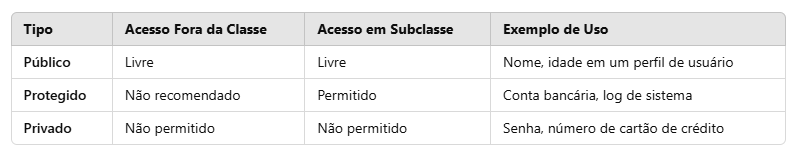

**Exemplo Completo de Encapsulamento**

In [ ]:
class Carro:
    def __init__(self, modelo, cor, ano):
        self.modelo = modelo  # Público
        self._cor = cor  # Protegido
        self.__ano = ano  # Privado

    def mostrar_info(self):
        return (f"Modelo: {self.modelo}, Cor: {self._cor}, Ano: {self.__ano}")

    def _alterar_cor(self, nova_cor):  # Método protegido
        self._cor = nova_cor

    def __alterar_ano(self, novo_ano):  # Método privado
        self.__ano = novo_ano

# Criando um objeto
carro = Carro("Fusca", "Azul", 1970)
print(carro.modelo)  # Atributo público
print(carro._cor)  # Acesso permitido, mas não recomendado
carro._alterar_cor("Vermelho")
print(carro.mostrar_info())


Fusca
Azul
Modelo: Fusca, Cor: Vermelho, Ano: 1970


**Conclusão**

O **encapsulamento** é essencial para proteger os dados e garantir um melhor **controle sobre o acesso e modificação** dos atributos de um objeto.

Ao utilizar corretamente os modificadores de acesso (**público, protegido e privado**), conseguimos criar sistemas mais seguros, modulares e fáceis de manter.

**Aqui estão alguns exemplos de aplicações práticas do encapsulamento em projetos reais.**

**Exemplo: Controle de Estoque com Atributos Privados**

Neste exemplo, criamos um sistema de estoque que protege a quantidade de itens e só permite modificá-la por meio de métodos específicos.

In [ ]:
class Produto:
    def __init__(self, nome, preco, quantidade):
        self.__nome = nome  # Atributo privado
        self.__preco = preco  # Atributo privado
        self.__quantidade = quantidade  # Atributo privado

    def adicionar_estoque(self, quantidade):
        """Adiciona itens ao estoque."""
        if quantidade > 0:
            self.__quantidade += quantidade
            print(f"{quantidade} unidades adicionadas ao estoque de {self.__nome}.")
        else:
            print("Quantidade inválida para adicionar!")

    def remover_estoque(self, quantidade):
        """Remove itens do estoque se houver quantidade suficiente."""
        if 0 < quantidade <= self.__quantidade:
            self.__quantidade -= quantidade
            print(f"{quantidade} unidades removidas do estoque de {self.__nome}.")
        else:
            print("Estoque insuficiente ou quantidade inválida!")

    def consultar_estoque(self):
        """Retorna a quantidade disponível no estoque."""
        return f"Produto: {self.__nome} | Estoque: {self.__quantidade} unidades"

# Uso
produto1 = Produto("Notebook", 3500, 10)

produto1.adicionar_estoque(5)  # Adiciona 5 ao estoque
produto1.remover_estoque(3)  # Remove 3 do estoque
print(produto1.consultar_estoque())  # Consulta o estoque



5 unidades adicionadas ao estoque de Notebook.
3 unidades removidas do estoque de Notebook.
Produto: Notebook | Estoque: 12 unidades


**2. Aplicação Web - Sistema de Usuários**

Em um sistema web, as senhas dos usuários devem ser protegidas para evitar exposição.

In [ ]:
import hashlib

class Usuario:
    def __init__(self, nome, senha):
        self.nome = nome
        self.__senha = self.__criptografar_senha(senha)  # Atributo privado

    def __criptografar_senha(self, senha):
        return hashlib.sha256(senha.encode()).hexdigest()  # Método privado

    def validar_senha(self, senha):
        return self.__criptografar_senha(senha) == self.__senha

# Uso
usuario = Usuario("Alice", "minha_senha_secreta")
print(usuario.validar_senha("minha_senha_secreta"))  # True
print(usuario.validar_senha("senha_errada"))  # False


**Por que usar encapsulamento?**

A senha não pode ser acessada diretamente (self.__senha).

O método de criptografia (__criptografar_senha) não pode ser chamado de fora da classe.

**Exemplo: Sistema de Frota de Veículos**

Neste exemplo, criamos um sistema de gerenciamento de frota, onde a quilometragem do veículo é um atributo privado e só pode ser alterado pelos métodos corretos.

In [ ]:
class Veiculo:
    def __init__(self, modelo, ano, quilometragem):
        self.modelo = modelo
        self.ano = ano
        self.__quilometragem = quilometragem  # Atributo privado

    def adicionar_km(self, km):
        """Adiciona quilometragem ao veículo."""
        if km > 0:
            self.__quilometragem += km
            print(f"{km} km adicionados ao veículo {self.modelo}.")
        else:
            print("Valor inválido!")

    def consultar_km(self):
        """Retorna a quilometragem atual do veículo."""
        return f"Veículo: {self.modelo} | Ano: {self.ano} | Quilometragem: {self.__quilometragem} km"

# Uso
carro1 = Veiculo("Toyota Corolla", 2020, 50000)

carro1.adicionar_km(1500)  # Adiciona 1500 km
print(carro1.consultar_km())  # Consulta a quilometragem


**🔹 O que esse exemplo ensina?**

✅ Usa atributo privado (__quilometragem) para evitar modificações diretas

✅ Permite alteração controlada através do método adicionar_km()

✅ Oferece consulta segura da quilometragem

# **Lista de Exercícios**

**Exercícios práticos sobre encapsulamento**

**Exercício 1: Atributo Público com Método de Exibição**
* Tarefa: Crie uma classe Produto com um atributo público nome e um método exibir_nome() que exibe o nome do produto.
* Objetivo: Compreender o uso de atributos públicos em métodos.

**Exercício 2: Atributo Protegido com Método de Modificação**
* Tarefa: Implemente uma classe Carro com um atributo protegido _modelo e um método atualizar_modelo(modelo) para alterar seu valor.
* Objetivo: Explorar o uso de atributos protegidos.

**Exercício 3: Controle de Acesso com Métodos Privados**
* Tarefa: Desenvolva uma classe ContaBancaria com um atributo privado __senha e métodos acessores para acessar o saldo e realizar operações.
* Objetivo: Garantir o controle de acesso aos atributos privados.

**Exercício 4: Método Protegido para Modificação de Atributo**
*Tarefa: Crie uma classe Aluno com um atributo protegido _nota e um método protegido modificar_nota(nota) para alterar a nota.
* Objetivo: Trabalhar com métodos protegidos.

**Exercício 5: Atributos Privados com Métodos Públicos**
* Tarefa: Implemente uma classe Produto onde o atributo privado __preco pode ser acessado através de um método público get_preco().
* Objetivo: Proteger atributos sensíveis e permitir acesso controlado.

**Exercício 6: Sistema de Login com Atributos Privados**
* Tarefa: Desenvolva uma classe Usuario que armazene a __senha de forma segura e tenha um método validar_senha(senha) que compara a senha.
* Objetivo: Aprender a proteger informações sensíveis.

**Exercício 7: Atributo Público com Validação**
* Tarefa: Crie uma classe Pessoa com um atributo público idade e um método validar_idade(), que retorna True se a idade for maior ou igual a 18.
* Objetivo: Compreender validações em atributos públicos.

**Exercício 8: Encapsulamento de Salário com Método de Acesso**
* Tarefa: Crie uma classe Funcionario que encapsule o atributo privado __salario e tenha um método informar_salario() que retorna o valor.
* Objetivo: Manter a privacidade dos dados financeiros.

**Exercício 9: Controle de Atributos Privados com Métodos Públicos**
* Tarefa: Implemente uma classe Livro com atributos públicos titulo e autor, e um atributo privado __isbn com um método get_isbn() para acesso.
* Objetivo: Diferenciar atributos públicos e privados.

**Exercício 10: Classes Aninhadas com Atributos Protetores**
* Tarefa: Crie uma classe Biblioteca que contém uma classe aninhada Livro, com um atributo protegido _titulo.
* Objetivo: Explorar encapsulamento em classes aninhadas.

**Exercício 11: Método Privado para Cálculo de Juros**
* Tarefa: Crie uma classe Banco com um atributo privado __taxa_juros e um método privado __calcular_juros(saldo).
* Objetivo: Explorar métodos privados que realizam cálculos internos.

**Exercício 12: Sistema de Reserva com Atributos Protegidos**
* Tarefa: Desenvolva uma classe Reserva que possui um atributo protegido _detalhes, com método mostrar_detalhes() que exibe as informações.
* Objetivo: Garantir segurança dos dados enquanto permite acesso supervisionado.

**Exercício 13: Gerenciamento de Estoque com Atributo Protegido**
* Tarefa: Crie uma classe Loja que mantém um atributo protegido _estoque e um método adicionar_produto(produto) para modificar o estoque.
* Objetivo: Controlar acesso aos dados de estoque.

**Exercício 14: Aplicativo de Contatos com Validação de CPF**
* Tarefa: Crie uma classe Cliente com um atributo privado __cpf, um método cadastrar_cliente() e um método estático validar_cpf(cpf).
* Objetivo: Integrar verificações de validação de forma encapsulada.